In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine

In [2]:
w=load_wine()

In [3]:
print(w.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
x=w.data
y=w.target

In [5]:
x[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [6]:
from sklearn.decomposition import PCA ###指令超難記...

In [7]:
pca=PCA(n_components=2)

In [8]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
x[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [10]:
X=pca.transform(x) ###變身～

In [11]:
X[1]

array([303.09741966,  -5.36471768])

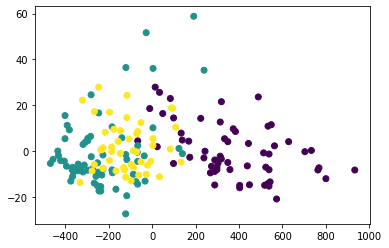

In [12]:
plt.scatter(X[:,0],X[:,1],c=y) ###太七彩了吧

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.svm import SVC

In [16]:
clf=SVC()

In [18]:
clf.gamma='auto'

In [20]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_predict=clf.predict(x_test)

In [22]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

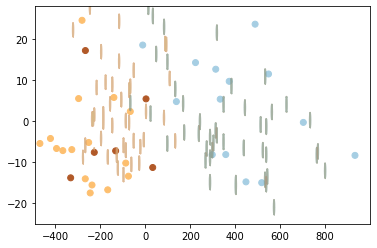

In [28]:
x0=np.arange(-490,1000,0.1)
y0=np.arange(-25,28,0.1)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)
plt.contour(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')
#再小會當掉...跑不出來（。＿。）